## Методические указания по выполнению лабораторной работы №1

**Тема: Классификация изображений с использованием предобученной модели ResNet**

**Цель работы:** ознакомиться с принципами работы глубоких сверточных нейронных сетей (CNN) и научиться применять предобученную модель ResNet для классификации изображений.

**Задачи:**
- Познакомиться с архитектурой сети ResNet и её ключевыми особенностями 
- Ознакомиться с особенностями датасета CIFAR-10
- Использовать предобученную модель ResNet-50 для классификации изображений
- Оценить качество классификации с помощью метрик точности (accuracy), precision, recall и F1-score
- Визуализировать предсказания и проанализировать ошибки модели

### 1. Теоретическая часть

В данной лабораторной работе мы будем работать с готовыми компонентами, минимально изменяя их по необходимости для возможности корректного взаимодействия друг с другом. Для задачи классификации будем применять архитектуру [ResNet](https://arxiv.org/pdf/1512.03385) в конфигурации, содержащей 50 слоев, обученную на наборе данных [ImageNet](https://www.kaggle.com/c/imagenet-object-localization-challenge/overview/description), а для запуска прогнозов модели воспользуемся набором данных [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). **Перед тем, как приступать к выполнению практической части, ознакомьтесь с первоисточниками используемых компонентов и изучите их содержание и структуру.**

#### 1.1 Датасет CIFAR-10
CIFAR-10 — один из наиболее популярных наборов данных для задач классификации изображений, содержащий 60 000 цветных изображений размером 32×32 пикселя, распределённых по 10 классам.

Классы CIFAR-10:
1. Самолёт (airplane)
2. Автомобиль (automobile)
3. Птица (bird)
4. Кошка (cat)
5. Олень (deer)
6. Собака (dog)
7. Лягушка (frog)
8. Лошадь (horse)
9. Корабль (ship)
10. Грузовик (truck)

Каждый класс содержит 6000 изображений, из которых 5000 в обучающем наборе и 1000 в тестовом. Датасет является сбалансированным, то есть все классы представлены в равных количествах.
Любой набор данных можно свести к двум составным компонентам: признаки, характеризующие классы, и метки классов. В случае с изображениями признаками будут комбинации пикселей, формирующие содержимое, которое можно категоризировать.

#### 1.2 Сверточные нейронные сети (CNN)
Сверточные нейронные сети (Convolutional Neural Networks, CNN) представляют собой тип нейросетей, разработанных специально для обработки изображений. Их ключевая особенность — сверточные слои, которые позволяют модели автоматически извлекать важные признаки изображения, такие как границы, текстуры и формы.

Основные компоненты CNN:
- Сверточные слои (Convolutional Layers) — применяют фильтры (ядра) для выделения пространственных признаков.
- Функция активации (ReLU, LeakyReLU) — делает сеть нелинейной и позволяет лучше различать сложные образы.
- Пулинг-слои (Pooling Layers) — уменьшают размерность признаков, снижая количество параметров.
- Полносвязные слои (Fully Connected Layers, FC) — завершают обработку, формируя финальные предсказания.

#### 1.3 Архитектура ResNet
**Проблема глубины сети**

Глубокие нейросети сталкиваются с затуханием градиента – эффектом, при котором на ранних слоях сети градиенты становятся слишком малыми, что делает обучение неэффективным.

**Основная идея ResNet**

В 2015 году команда исследователей из Microsoft Research предложила архитектуру Residual Networks (ResNet), которая позволила строить очень глубокие (до 152 слоев!) сверточные сети без затухания градиента.
Ключевая особенность – остаточные (skip) соединения, которые позволяют передавать информацию через несколько слоёв:

*y=F(x)+x*, где *F(x)* — выход нейронов свёрточного слоя, а *x* — входной сигнал.

Благодаря этому:
- Глубокие сети эффективно обучаются.
- Модель может переносить знания с простых слоёв на более сложные.
- Сеть лучше обобщает данные и меньше переобучается.

#### 1.4 Архитектура ResNet-50
    
ResNet-50 состоит из 50 слоёв, сгруппированных в 4 больших блока:

1. Входной сверточный слой (7×7, 64 фильтра) + MaxPooling.
2. Четыре residual-блока, содержащих Bottleneck-слои (1×1 → 3×3 → 1×1 свертки).
3. Полносвязный выходной слой с функцией активации Softmax для классификации.

**Сравнение разных версий ResNet**

| Модель| Кол-во слоев | Параметры (млн) | Точность на ImageNet (%) |
| ----------- | ----------- | ----------- | ----------- |
| ResNet-18 | 18 | 11M | 69.8 |
| ResNet-34	| 34 | 21M	| 73.3| 
| ResNet-50	| 50	| 25M	| 76.6| 
| ResNet-101	| 101	| 44M	| 78.3| 
| ResNet-152	| 152	| 60M	| 78.9|

ResNet-50 считается оптимальным компромиссом между размером сети и качеством классификации.


### 2. Практическая часть

#### 2.1 Подготовка окружения

Установите необходимые зависимости:

In [2]:
pip install torch torchvision matplotlib numpy scikit-learn seaborn

/home/sypoo/mtuci/nn/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


Импортируйте необходимые библиотеки: 

In [3]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.utils
from torchvision import models, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#### 2.2. Загрузка предобученной модели ResNet-50

Загрузите в проект модель и выведите ее структуру:

In [4]:
model = models.resnet50(pretrained=True)
model.eval()  # Переводим модель в режим инференса
print(model)

/home/sypoo/mtuci/nn/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sypoo/mtuci/nn/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/sypoo/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100.0%


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

**Обратите внимание** на структуру выходного слоя модели: он полносвязный и содержит 1000 параметров. Это обусловлено спецификой загруженной модели. Как было сказано ранее, используемый ResNet обучен на наборе данных [ImageNet](https://www.kaggle.com/c/imagenet-object-localization-challenge/overview/description), содержащем 1000 классов. Мы вернемся к этому моменту чуть позже, когда непосредственно столкнемся с нюансами, связанными с этим.

#### 2.3 Загрузка и предобработка изображений

Загрузите тестовые изображения из CIFAR-10:

100.0%
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].


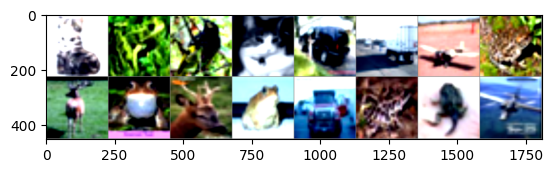

In [5]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet-50 ожидает изображения 224×224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  std=[0.229, 0.224, 0.225])
])

dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

# Визуализация примера изображений для проверки корректной распаковки датасета
def imshow(img):
    img = img / 2 + 0.5  # Денормализация
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

images, labels = next(iter(dataloader))
imshow(torchvision.utils.make_grid(images))

Следующим этапом можно выполнить предсказание обученной модели. Использовать для этого тестовую выборку ImageNet сложно, потому что этот набор данных достаточно тяжелый (> 160 GB) и потребует много ресурсов для инференса. В этой ситуации нам может помочь относительно небольшой CIFAR-10. Однако количество классов не совпадает с количеством параметров выходного слоя, что делает невозможным проведение предсказания. 

Из этой ситуации есть несколько выходов, не затрагивающих обучение модели на CIFAR-10. Попробуем провести эксперимент с подготовкой модели к предсказанию. Наиболее приемлемый, хоть и не самый простой метод, допустимый в текущих условиях, заключается в выборе 10 классов ImageNet, совпадающих с классами CIFAR-10. Такая техника называется маппинг классов. Каждый класс CIFAR-10 соответствует множеству ImageNet-классов. Для класса cat это могут быть ImageNet-классы: tabby, tiger cat, Persian cat, Siamese cat и т.д. 

Чтобы «свести» предсказания к 10 классам CIFAR-10 посредством агрегирования вероятностей для групп ImageNet-классов для начала необходимо получить файл разметки ImageNet и извлечь классы в словарь для дальнейшей предобработки. Для этого в структуре проекта должен находиться подготовленный текстовый файл ImageNet-лейблов.

In [6]:
imagenet_dict = {}

with open("map_clsloc.txt", "r", encoding="utf-8") as file:
    for line in file:
        line = line.strip()
        if not line:
            continue
        # Токенизируем строку по пробелам
        tokens = line.split()
        if len(tokens) < 3:
            continue
        synset = tokens[0]
        # Преобразуем номер класса к целому числу и приводим к 0-индексации
        index = int(tokens[1]) - 1
        # Если метка класса состоит из нескольких слов, объединяем их
        class_label = " ".join(tokens[2:])
        imagenet_dict[index] = class_label

# Для проверки выводим первые 5 элементов словаря
for i in range(5):
    print(f"{i}: {imagenet_dict.get(i, 'Нет данных')}")


0: kit_fox
1: English_setter
2: Siberian_husky
3: Australian_terrier
4: English_springer


Получив словарь необходимо написать непосредственно функцию маппинга, выполняющую предобработку и фильтрацию.
Такой метод представляется достаточно упрощённым. В реальном применении имеет смысл более тщательно подбирать ключевые слова.

In [7]:
def map_imagenet_to_cifar10(imagenet_name):
    name = imagenet_name.lower()
    if "airplane" in name or "jet" in name or "warplane" in name:
        return "airplane"
    elif "car" in name or "automobile" in name or "limousine" in name:
        return "automobile"
    elif "bird" in name or "robin" in name or "sparrow" in name:
        return "bird"
    elif "cat" in name:
        return "cat"
    elif "deer" in name or "antelope" in name:
        return "deer"
    elif "dog" in name or "hound" in name or "puppy" in name:
        return "dog"
    elif "frog" in name or "toad" in name:
        return "frog"
    elif "horse" in name:
        return "horse"
    elif "ship" in name or "boat" in name:
        return "ship"
    elif "truck" in name or "lorry" in name:
        return "truck"
    else:
        return None


Теперь мы готовы выполнить предсказание модели на тестовых данных с применением реализованного маппера. Для этого создадим функцию прогнозирования, которая получает выходы модели (логиты для 1000 классов), применяет softmax и агрегирует вероятности с учетом адаптации предобученной на ImageNet модели к набору данных CIFAR-10 в соответствии с маппингом:

In [8]:
# Определяем список классов CIFAR-10
cifar10_classes = ["airplane", "automobile", "bird", "cat", 
                       "deer", "dog", "frog", "horse", "ship", "truck"]

def imagenet_to_cifar10_prediction(outputs, imagenet_names):
    # Применяем softmax, чтобы получить вероятности по 1000 классам
    probs = F.softmax(outputs, dim=1)
     
    batch_size = probs.size(0)
    # Инициализируем тензор для суммарных вероятностей для каждого из 10 классов
    aggregated_probs = torch.zeros(batch_size, len(cifar10_classes)).to(probs.device)
    
    # Проходим по всем 1000 ImageNet-классам
    for idx in range(1000):
        mapped_class = map_imagenet_to_cifar10(imagenet_names[idx])
        if mapped_class is not None:
            cifar_idx = cifar10_classes.index(mapped_class)
            aggregated_probs[:, cifar_idx] += probs[:, idx]
    
    # Определяем для каждого изображения класс CIFAR-10 с максимальной суммарной вероятностью
    _, predicted = torch.max(aggregated_probs, 1)
    return predicted

#### 2.4 Классификация изображений, визуализация предсказаний и оценка качества модели
Получим предсказания меток классов для одного батча изображений:

In [9]:
# Берём один батч изображений
images, labels = next(iter(dataloader))

with torch.no_grad():
    outputs = model(images)  # Логиты для 1000 классов ImageNet

# Применяем маппинг для получения предсказаний для CIFAR-10
predicted_cifar10 = imagenet_to_cifar10_prediction(outputs, imagenet_dict)

# Сопоставляем индексы с именами классов CIFAR-10
true_labels = [cifar10_classes[i] for i in labels.cpu().numpy()]

predicted_labels = [cifar10_classes[i] for i in predicted_cifar10.cpu().numpy()]

print("Predicted CIFAR-10 classes:", predicted_labels)


Predicted CIFAR-10 classes: ['automobile', 'dog', 'dog', 'automobile', 'automobile', 'cat', 'dog', 'frog', 'automobile', 'cat', 'automobile', 'dog', 'truck', 'automobile', 'frog', 'dog']


Для большей наглядности результата визуализируем изображения, а также сопоставим истинные и спрогнозированные метки классов. Для этого реализуем метод денормализации изображения и сведем результат в удобный для восприятия вид:

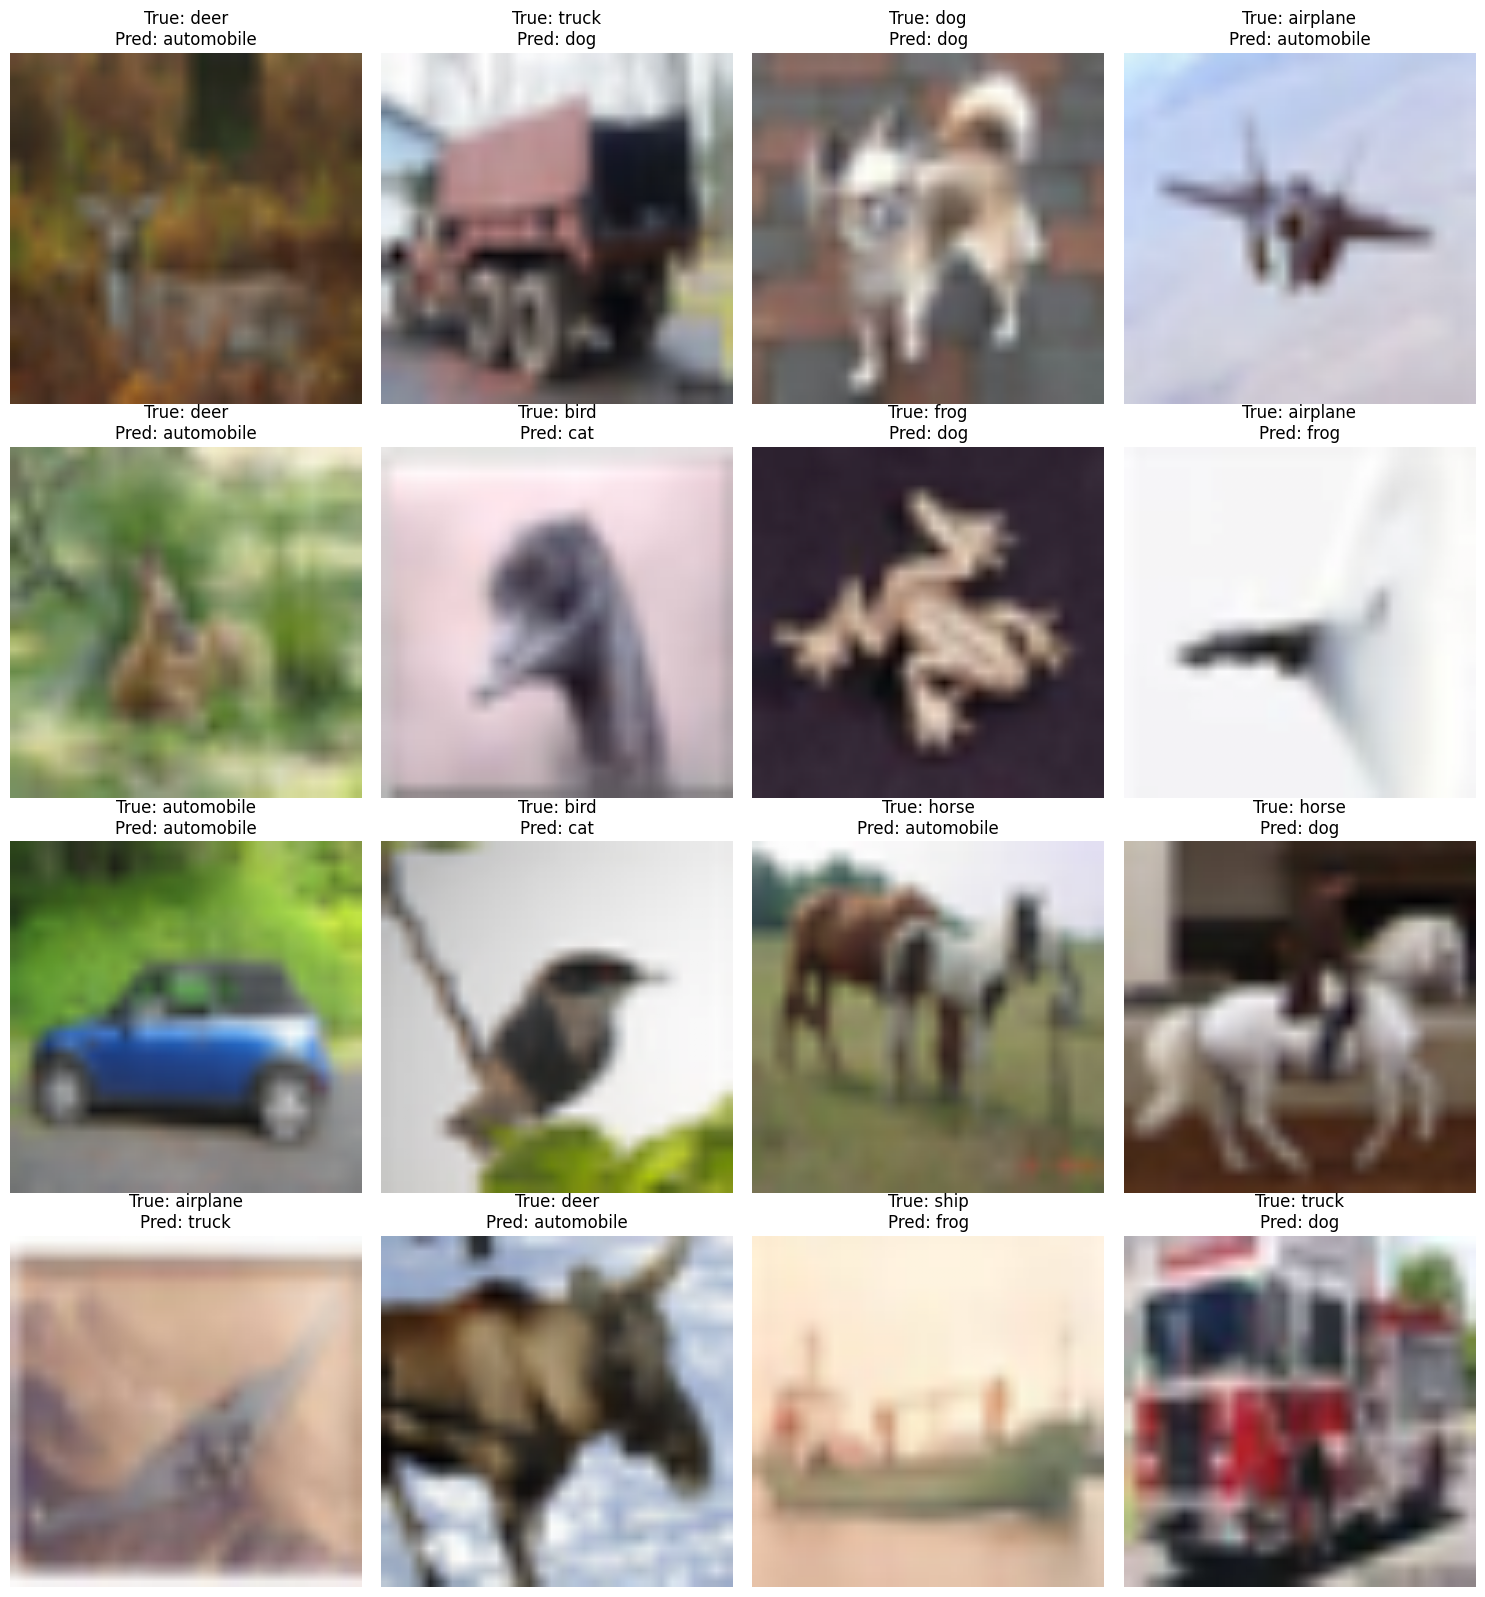

In [10]:
def denormalize(img_tensor):
    # Параметры нормализации, использованные при предобработке
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    return img_tensor * std + mean

# Определяем количество изображений в батче
batch_size = images.size(0)
ncols = 4  # число столбцов для сетки изображений
nrows = (batch_size + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4 * nrows))
axes = axes.flatten()

for i in range(batch_size):
    img = denormalize(images[i]).cpu().permute(1, 2, 0).numpy()
    ax = axes[i]
    ax.imshow(img)
    ax.set_title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
    ax.axis('off')
    
# Если осей больше, чем изображений, скрываем лишние
for j in range(batch_size, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


#### 2.5 Оценка качества модели на всем тестовом датасете
После анализа одного батча можно оценить производительность модели на всем наборе данных:

/home/sypoo/mtuci/nn/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sypoo/mtuci/nn/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sypoo/mtuci/nn/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.13      0.47      0.20      1000
        bird       0.04      0.03      0.03      1000
         cat       0.04      0.03      0.03      1000
        deer       0.00      0.00      0.00      1000
         dog       0.17      0.68      0.27      1000
        frog       0.04      0.01      0.02      1000
       horse       0.00      0.00      0.00      1000
        ship       0.00      0.00      0.00      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.12     10000
   macro avg       0.04      0.12      0.06     10000
weighted avg       0.04      0.12      0.06     10000



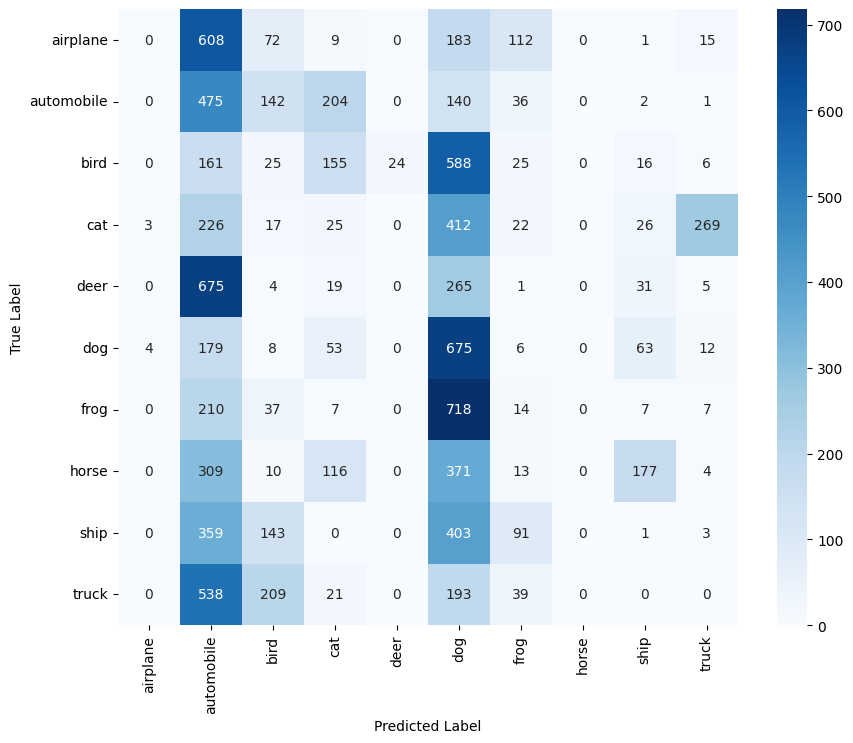

In [11]:
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in dataloader:
        outputs = model(images)
        predicted = imagenet_to_cifar10_prediction(outputs, imagenet_dict)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.cpu().numpy())

# Выводим отчёт по метрикам
print(classification_report(y_true, y_pred, target_names=cifar10_classes))

# Строим матрицу ошибок
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cifar10_classes, yticklabels=cifar10_classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### 3. Контрольные вопросы

1. Какие преимущества дают остаточные соединения (skip-connections)?
2. Как ResNet справляется с проблемой затухания градиента?
3. Какие метрики позволяют оценить качество модели?
4. В чём заключается идея маппинга 1000 ImageNet-классов в 10 классов CIFAR-10?
5. Какие преимущества и недостатки имеет такой подход по сравнению с заменой выходного слоя модели?
6. Почему важно нормализовать изображения перед подачей в модель?
7. Как можно интерпретировать матрицу ошибок и отчёт по метрикам?